# MileStone Project
## Problem Defination
### Data
### Evaluate
### Feature
### Modeling
### Experimentation
- Secure Heart Disease Data
- Load Data 
- Perform Data Analysis (EDA)
    - Get data Features
    - Load Environment
- Load ML and DL libraries
- 

In [1]:
# Data libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modeling libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Model import evaluation libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
np.random.seed(7)
import pickle as pc
%matplotlib inline

# Problem Defination
+ Based on the given data we need to predict if a patient has heart disease or not

# Data
> + Data Loaded,
> Make Sure if out model give us the 95% accuracy or above

In [2]:
df = pd.read_csv('heart.csv')
df
# df['thall'].unique()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Evaluate
>> In Initial stages we need to make sure if our model gives us that accuracy

# Features
+ age = age
+ sex = sex (0,1)
+ cp = chest pain type (4 values)
+ trestbps = resting blood pressure
+ chol = serum cholestoral in mg/dl
+ fbs = fasting blood sugar > 120 mg/dl
+ restecg = resting electrocardiographic results (values 0,1,2)
+ thalach = maximum heart rate achieved
+ exang  = exercise induced angina
+ oldpeak = ST depression induced by exercise relative to rest
+ slp = the slope of the peak exercise ST segment
+ caa = number of major vessels (0-3) colored by flourosopy
+ thal =  0 = normal; 1 = fixed defect; 2 = reversable defect 3 = irreversible
> The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

# Exploratory Data Analysis

In [3]:
# What is the problem i am going to solve
    #> With out knowing problem, worst thing I can do is the hard work
# what kind of data I have
# Does this data have missing value
# Are there any outliers, sporious vectors
# can er add or remove some of the features

In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.rename(columns={'output':'target'}, inplace =True)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: xlabel='target'>

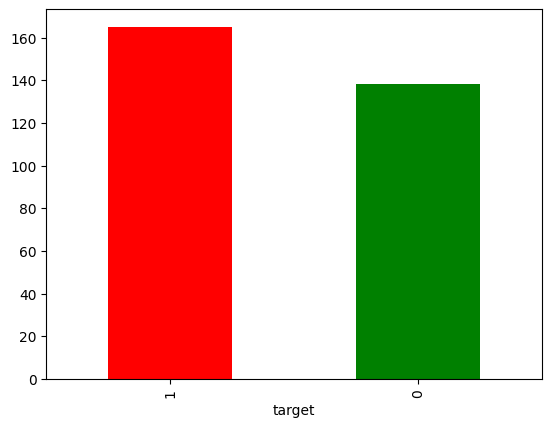

In [8]:
df['target'].value_counts().plot(kind = 'bar', color = ['red','green'])

In [9]:
df.isna().sum() # are there any empty values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


sex
1    207
0     96
Name: count, dtype: int64

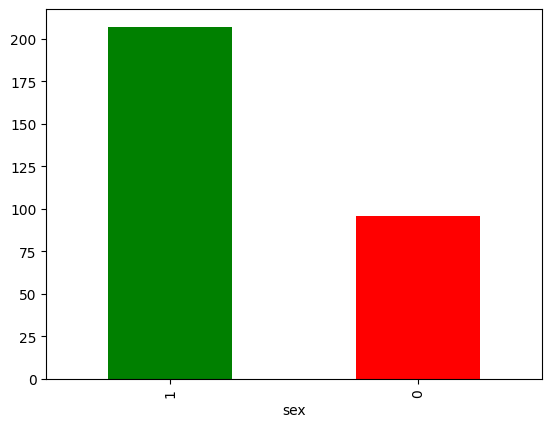

In [11]:
df.sex.value_counts().plot(kind = 'bar', color = ['green', 'red']) # 1 = male, 0 = female
df.sex.value_counts()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

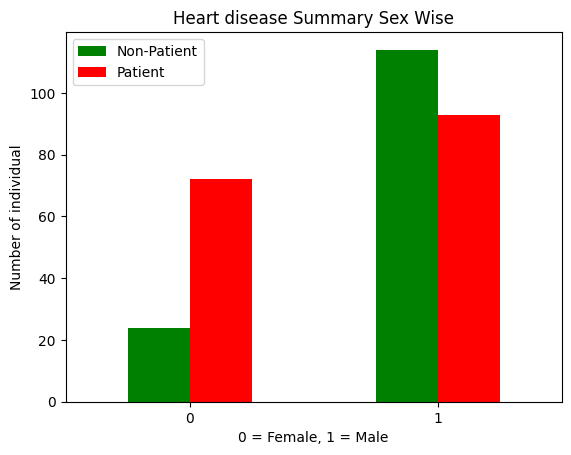

In [18]:
pd.crosstab(df.sex, df.target).plot(kind = 'bar', color = ['green', 'red'])
# pd.crosstab(df.sex, df.age).plot(kind = 'bar', color = ['green', 'red'])
plt.title('Heart disease Summary Sex Wise')
plt.xlabel('0 = Female, 1 = Male')
plt.ylabel('Number of individual')
plt.legend(['Non-Patient',"Patient"])
plt.xticks(rotation = 0)

(array([20., 30., 40., 50., 60., 70., 80.]),
 [Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

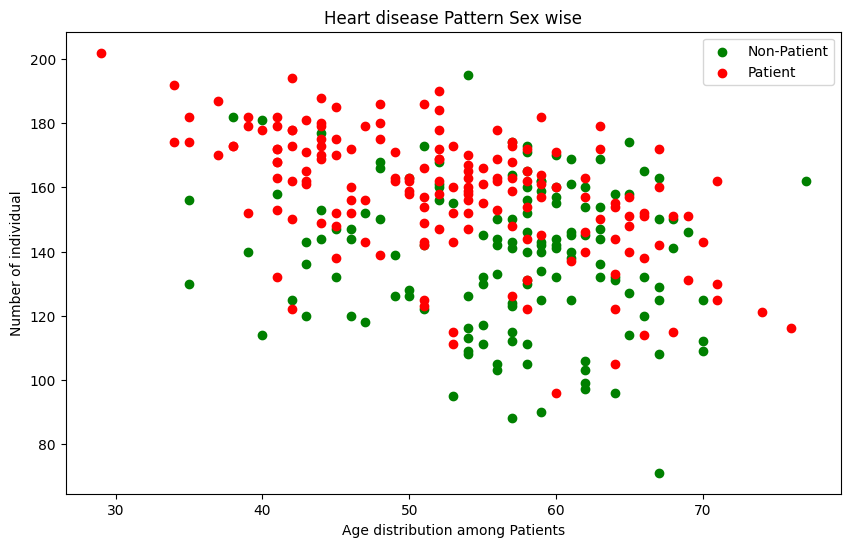

In [36]:
# Plot Choice
plt.figure(figsize=(10,6))
# create scatter plot
plt.scatter(df.age[df.target==0], df.thalachh[df.target==0], c = "green");
plt.scatter(df.age[df.target==1], df.thalachh[df.target==1], c = "red");
# surkhi power means coustomization
plt.title('Age Vs Heart Rate Effect')
plt.xlabel('Age distribution among Patients')
plt.ylabel('Heart Rate')
plt.legend(['Non-Patient',"Patient"])
plt.xticks(rotation = 0)

<Axes: ylabel='Frequency'>

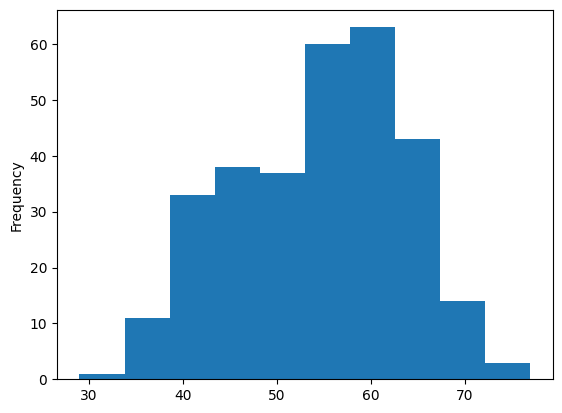

In [37]:
# craete Histogram to see distribution 
df.age.plot.hist()